<a href="https://colab.research.google.com/github/gdjeudeu/NTFLX_Stock_Prediction/blob/main/Netflix_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the dependcies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
#Store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
232,2020-10-13,540.559998,557.650024,537.200012,554.090027,554.090027,5602500
233,2020-10-14,562.609985,572.489990,541.000000,541.450012,541.450012,9510100
234,2020-10-15,545.520020,551.219971,535.099976,541.940002,541.940002,5113100
235,2020-10-16,549.500000,554.330017,530.030029,530.789978,530.789978,6347400
236,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
237,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
238,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
239,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
240,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
241,2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100


In [ ]:
#Get the number of trading days
df.shape

(252, 7)

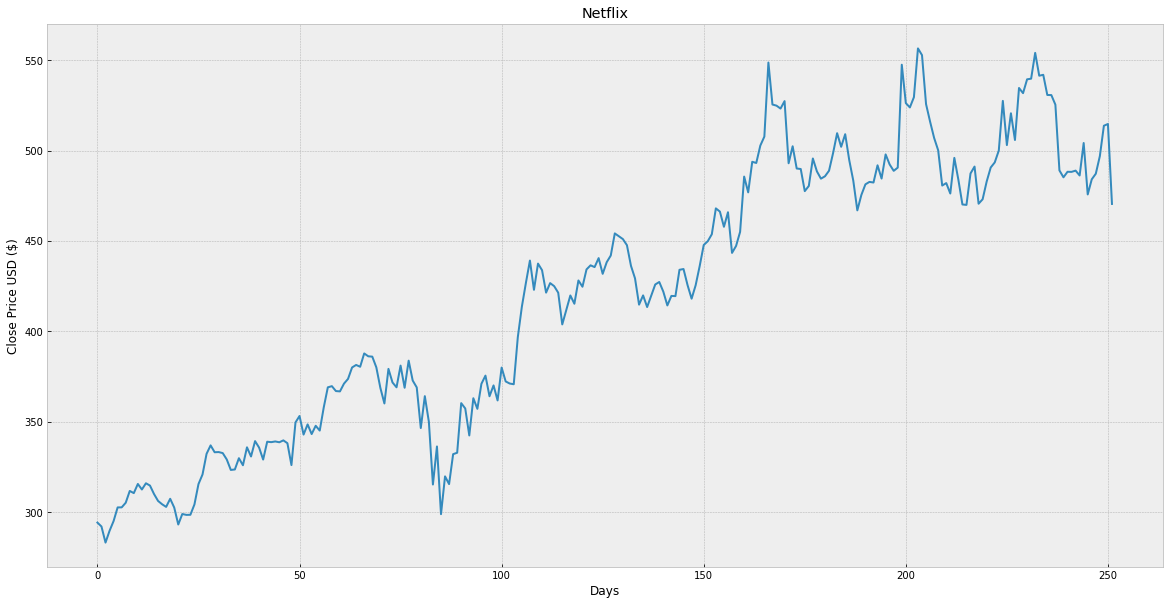

In [ ]:
#Visualize the close price data
plt.figure(figsize=(20, 10))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [ ]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,294.179993
1,292.010010
2,283.109985
3,289.619995


In [ ]:
#Create a variable to predict 'X' days out into the future
future_days = 25
#Create a new column (target) shifted 'X' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(30)

,Close,Prediction
222,493.480011,487.220001
223,500.029999,496.950012
224,527.510010,513.760010
225,503.059998,514.729980
226,520.650024,470.500000
227,505.869995,NaN
228,534.659973,NaN
229,531.789978,NaN
230,539.440002,NaN
231,539.809998,NaN


In [ ]:
#Create the feature data set (X) and convert it to numpy array and remove the last 'X' row/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X

array([[294.179993],
       [292.01001 ],
       [283.109985],
       [289.619995],
       [295.029999],
       [302.570007],
       [302.600006],
       [305.160004],
       [311.690002],
       [310.480011],
       [315.549988],
       [312.48999 ],
       [315.929993],
       [314.660004],
       [309.98999 ],
       [306.160004],
       [304.320007],
       [302.859985],
       [307.350006],
       [302.5     ],
       [293.119995],
       [298.929993],
       [298.440002],
       [298.5     ],
       [304.209991],
       [315.480011],
       [320.799988],
       [332.220001],
       [336.899994],
       [333.100006],
       [333.200012],
       [332.630005],
       [329.089996],
       [323.309998],
       [323.570007],
       [329.809998],
       [325.899994],
       [335.829987],
       [330.75    ],
       [339.26001 ],
       [335.660004],
       [329.049988],
       [338.920013],
       [338.690002],
       [339.070007],
       [338.619995],
       [339.670013],
       [338.1

In [ ]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[315.480011 320.799988 332.220001 336.899994 333.100006 333.200012
 332.630005 329.089996 323.309998 323.570007 329.809998 325.899994
 335.829987 330.75     339.26001  335.660004 329.049988 338.920013
 338.690002 339.070007 338.619995 339.670013 338.109985 326.
 349.600006 353.160004 342.880005 348.519989 343.160004 347.73999
 345.089996 358.       369.01001  369.670013 366.950012 366.769989
 371.070007 373.690002 380.01001  381.399994 380.399994 387.779999
 386.190002 386.       380.070007 368.700012 360.089996 379.23999
 371.709991 369.029999 381.049988 368.769989 383.790009 372.779999
 368.970001 346.48999  364.130005 349.920013 315.25     336.299988
 298.839996 319.75     315.470001 332.029999 332.829987 360.269989
 357.320007 342.390015 362.98999  357.119995 370.959991 375.5
 364.079987 370.079987 361.76001  379.959991 372.279999 371.119995
 370.720001 396.720001 413.549988 426.75     439.170013 422.959991
 437.48999  433.829987 421.420013 426.700012 424.98999  421.380005
 403.829

In [ ]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[529.559998],
       [556.549988],
       [552.840027],
       [525.75    ],
       [516.049988],
       [507.019989],
       [500.190002],
       [480.670013],
       [482.029999],
       [476.26001 ],
       [495.98999 ],
       [483.859985],
       [470.200012],
       [469.959991],
       [487.350006],
       [491.170013],
       [470.609985],
       [473.079987],
       [482.880005],
       [490.649994],
       [493.480011],
       [500.029999],
       [527.51001 ],
       [503.059998],
       [520.650024]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regressor prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[513.76001  534.659973 531.789978 482.350006 539.809998 554.090027
 541.450012 541.940002 530.789978 530.719971 525.419983 489.049988
 485.230011 488.279999 556.549988 488.929993 485.230011 504.209991
 475.73999  484.119995 487.220001 496.950012 513.76001  488.809998
 520.650024]

[533.47130487 555.46316509 552.44023164 530.36685972 522.4631403
 515.10535781 509.54017904 493.63499087 494.74312844 490.04165239
 506.11794447 496.23422926 485.10387253 484.90829972 499.07795222
 502.19055285 485.43792486 487.45052059 495.43572644 501.76683335
 504.07277486 509.40980612 531.80094302 511.87869605 526.2113206 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


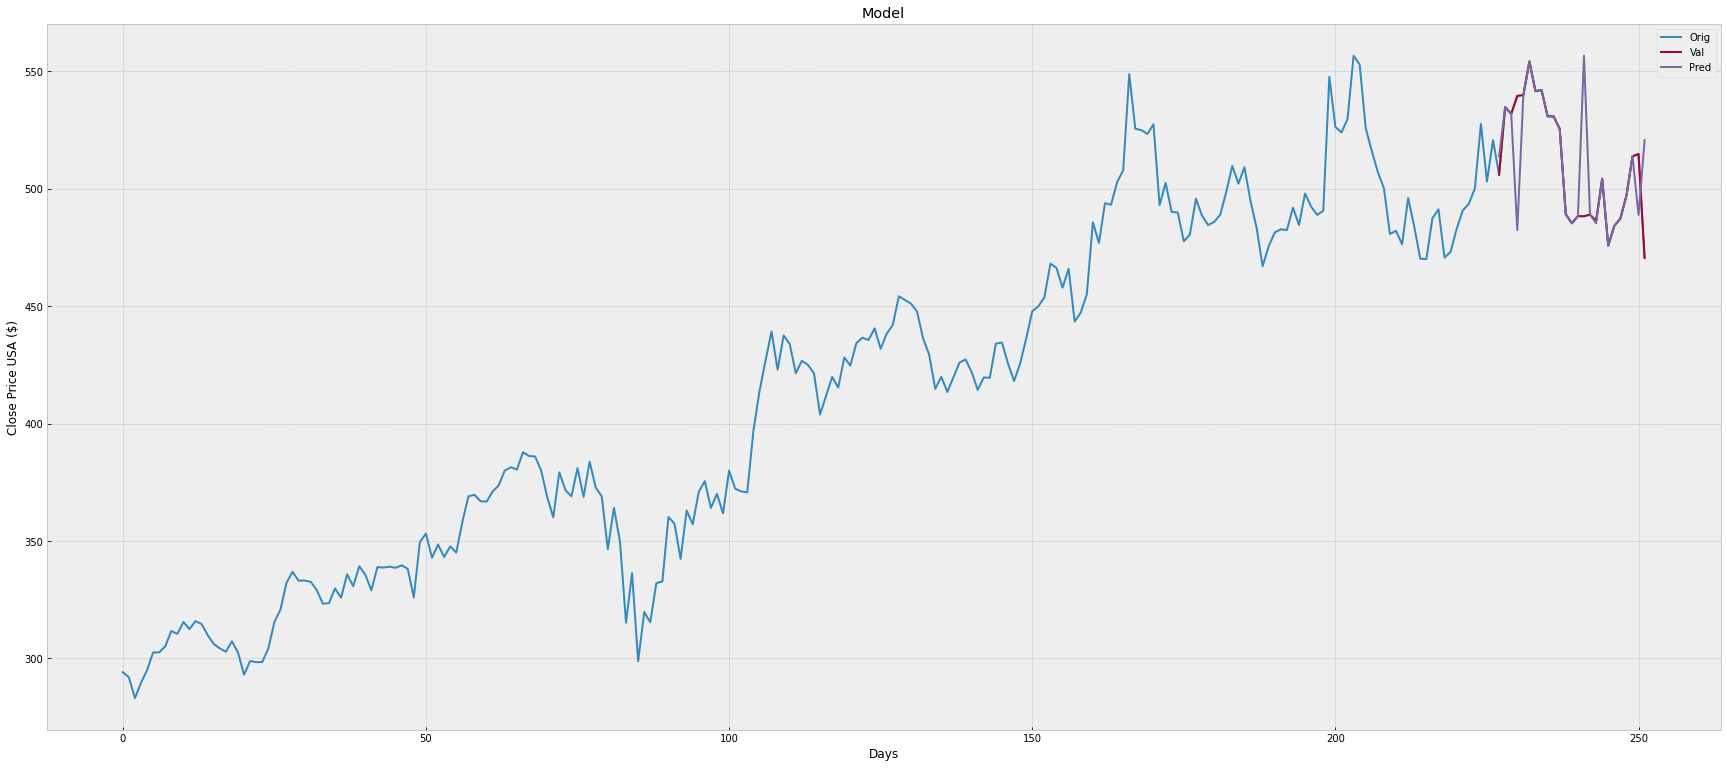

In [ ]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (30, 13))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USA ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


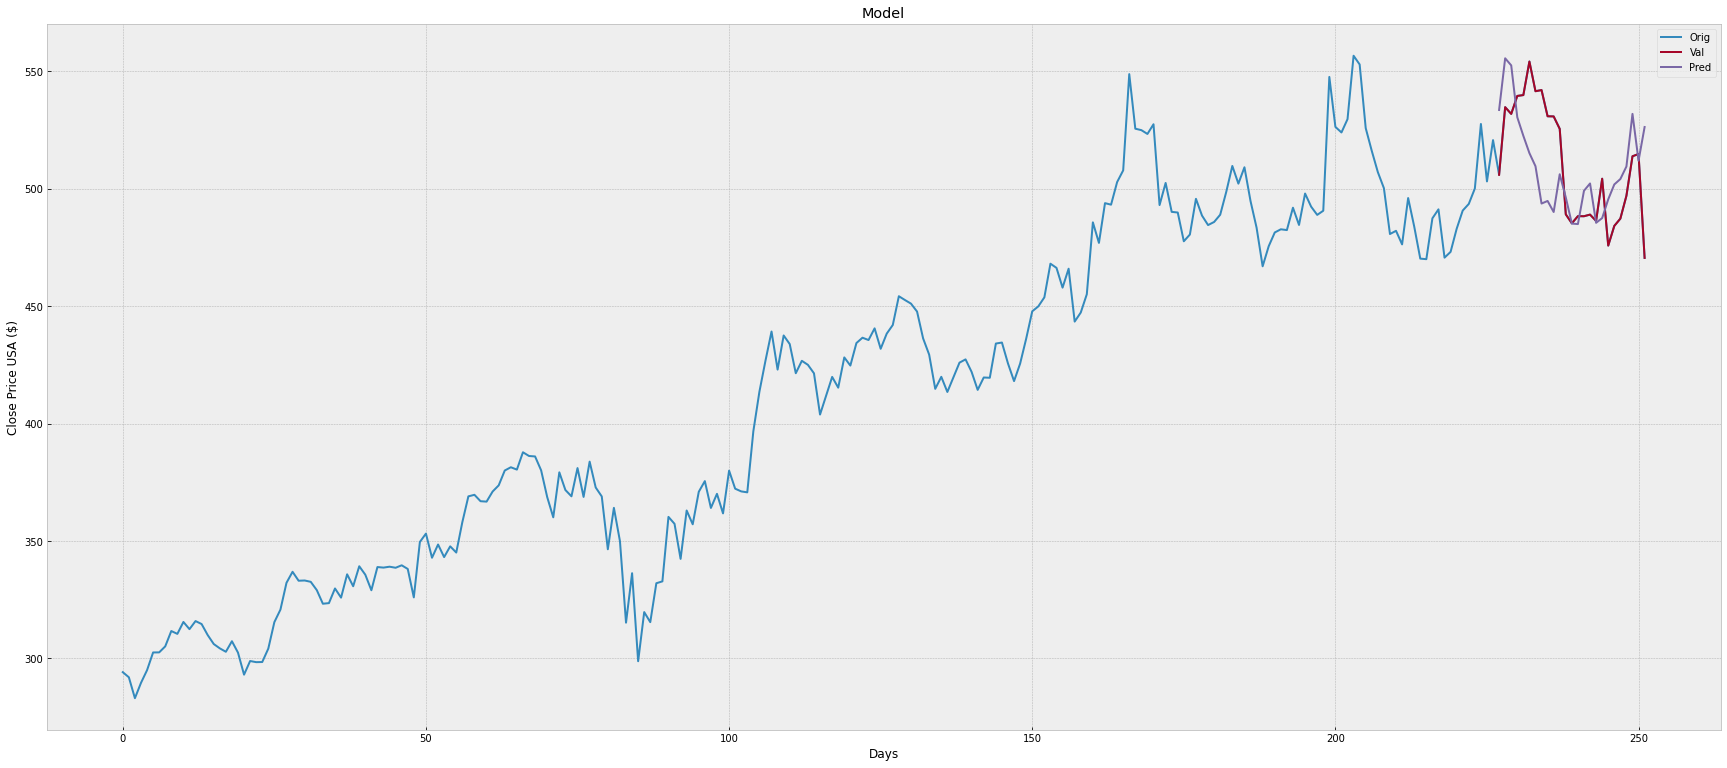

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (30, 13))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USA ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()